In [1]:
#Import packages
import os
import glob
import json
#from tqdm import tqdm

import nilearn
import nibabel as nib
from nilearn import image as nimg
from nilearn import plotting as nplot
# from nilearn.glm.first_level import FirstLevelModel, make_first_level_design_matrix, run_glm
#from nilearn.glm import fdr_threshold,threshold_stats_img
# from nilearn.glm.contrasts import compute_contrast


from bids.layout import BIDSLayout, parse_file_entities

# import cortex
# from cortex import fmriprep

# from nipype.interfaces.workbench.base import WBCommand
# from nipype.algorithms import modelgen
# from nipype.interfaces.base import Bunch

import hcp_utils as hcp

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm

# from PIL import Image

import first_level_sparse_scanning as flss 
import utils
import importlib


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [31]:
#del pvr_filtered[-1]

In [13]:
# tasks_included = ['emosent']
# parsed_valid_runs = flss.parse_valid_runs(tasks_included)

In [3]:
events = glob.glob('test/*.tsv')
# sub_list = [856, 859, 860, 867, 872, 873, 875, 877, 891, 
#             893, 895, 896, 897, 898, 957, 962, 963, 967, 
#             968, 969, 973, 976, 978, 979, 981]
#sub_list = [856,859, 860, 875, 893]
#sub_list = [875]
sub_list = [856]
sub_list = ['voice' + str(s) for s in sub_list]
test_img = [parse_file_entities(ev) for ev in events if parse_file_entities(ev)['subject'] in sub_list]
test_img

[{'subject': 'voice856',
  'session': '1',
  'task': 'emosent',
  'run': 2,
  'suffix': 'events',
  'extension': '.tsv'},
 {'subject': 'voice856',
  'session': '1',
  'task': 'emosent',
  'run': 3,
  'suffix': 'events',
  'extension': '.tsv'}]

In [5]:
# test_img = [p for p in parsed_valid_runs if p['subject'] == 'voice856']
# test_img[0]['run'] = 2
# test_img[1]['run'] = 3
# test_img

In [4]:
##for f-test

#contrast_list = ['happyvsil','neutralvsil','sadvsil']

#contrast_list = ['sadvneutral', 'speechvsil']
#contrast_list = ['happyvneutral']
contrast_list = ['speechvsil']

importlib.reload(flss)
#out_dir='../../derivatives/first_level_percondition/'
#out_dir = '../../derivatives/first_level_emosent_emospeech_112523/'
#out_dir = '../../derivatives/first_level_emosent_sadneutral_112713/'

#flss.convolve_sparse_scan_glm_with_cifti(pvr_filtered[0:1], out_dir, ohbm=True, con='sadvneutral', resmooth=False)
# for con in contrast_list:
#     flss.convolve_sparse_scan_glm_with_cifti(parsed_valid_runs, out_dir, ohbm=True, con=con, resmooth=False)
    #print(c,d)

out_dir='test/'    
con  = 'speechvsil'
probe = flss.convolve_sparse_scan_glm_with_cifti(test_img, out_dir, ohbm=True, con=con, resmooth=False, runshift = False)

started sub-voice856_ses-1_task-emosent_rec-unco_run-2
240116-15:07:58,307 nipype.interface INFO:
	 Setting dt = 110 ms

240116-15:07:58,308 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
240116-15:07:58,309 nipype.interface INFO:
	 reg_scale: 43.1973
240116-15:07:58,312 nipype.interface INFO:
	 Setting dt = 110 ms

240116-15:07:58,313 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
240116-15:07:58,314 nipype.interface INFO:
	 reg_scale: 43.1973
240116-15:07:58,316 nipype.interface INFO:
	 Setting dt = 110 ms

240116-15:07:58,317 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
240116-15:07:58,318 nipype.interface INFO:
	 reg_scale: 43.1973
240116-15:07:58,320 nipype.interface INFO:
	 Setting dt = 110 ms

240116-15:07:58,321 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
240116-15:07:58,322 nipype.interface INFO:
	 reg_scale: 43.1973
finished sub-voice856_ses-1_task-emosent_rec-unco_run-2
started sub-voice856_ses-1_task-emosent_rec-unco_run-3
24

<Axes: label='conditions', ylabel='scan number'>

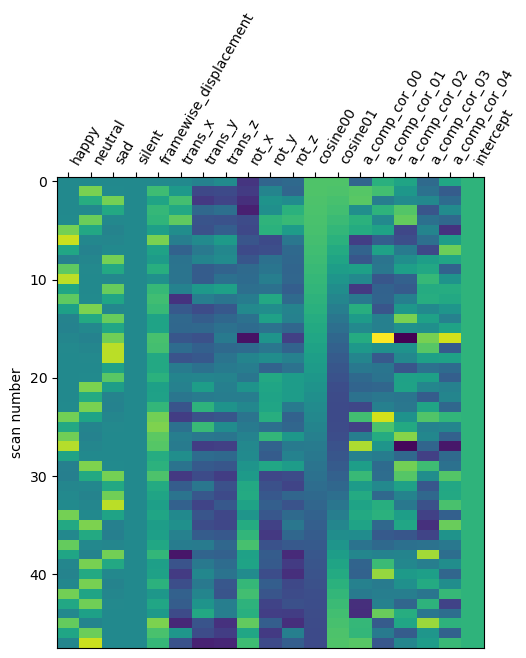

In [6]:
nplot.plot_design_matrix(probe[1])

In [21]:
mriqc_iqm = pd.read_table('../../derivatives/mriqc/group_bold.tsv')
emosent_qc = mriqc_iqm[mriqc_iqm.bids_name.str.contains('emosent')]
subject_qc = mriqc_iqm[mriqc_iqm.bids_name.str.contains('emosent') & mriqc_iqm.bids_name.str.contains('856')]

In [ ]:
## dvars_nstd typically should be at 10x 0.5%, we are seeing 10X that in general
## not fd_perc or fd_num since my motion is already high
## In column β1 GCOR, the global correlation averaged over the brain mask (GCOR) was added as a subject level covariate in the t-test.
## So GCOR is a regressor? not a threshold? Use as a subject-level covariate
## Oversimplified, but 85 might be a theoretical high for tsnr in grey matter


In [43]:
subject_qc[['gsr_x', 'gsr_y']]

,gsr_x,gsr_y
95,-0.012902,0.051395
96,-0.013054,0.050363
97,-0.014544,0.051353


In [25]:
emosent_qc

,bids_name,aor,aqi,dummy_trs,dvars_nstd,dvars_std,dvars_vstd,efc,fber,fd_mean,...,summary_bg_stdv,summary_fg_k,summary_fg_mad,summary_fg_mean,summary_fg_median,summary_fg_n,summary_fg_p05,summary_fg_p95,summary_fg_stdv,tsnr
0,sub-voice844_ses-1_task-emosent_run-1_bold,0.007186,0.004397,0,38.521025,1.244654,1.032105,0.534137,920.477600,0.213375,...,106.829849,4.285992,282.991698,854.968384,781.937500,168438.0,434.618752,1526.027118,357.442749,50.570133
1,sub-voice844_ses-1_task-emosent_run-2_bold,0.014137,0.006364,0,44.962121,1.273229,1.069226,0.534808,950.772217,0.336787,...,104.344902,4.186377,280.304482,850.964539,779.875000,168487.0,431.339597,1512.237512,353.215332,39.903574
17,sub-voice846_ses-1_task-emosent_run-1_bold,0.003772,0.009430,2,41.203112,1.101276,0.967228,0.492483,1685.253052,0.419987,...,93.591530,5.099550,295.263526,910.983704,837.934814,146420.0,475.152191,1614.284772,370.790192,29.851005
18,sub-voice846_ses-1_task-emosent_run-2_bold,0.005439,0.009348,0,53.478612,1.140891,0.963687,0.492706,1702.272217,0.573777,...,93.777931,5.044505,295.902708,907.809021,835.760437,146548.0,470.020844,1611.875000,370.759613,31.524285
34,sub-voice849_ses-1_task-emosent_run-1_bold,0.018792,0.008748,0,55.664325,1.233668,1.099123,0.504175,1343.734985,0.502109,...,89.094322,2.317534,247.208491,779.168884,726.270874,142178.0,414.208344,1317.464618,289.704407,31.293343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,sub-voice997_ses-1_task-emosent_run-2_bold,0.005938,0.005122,0,42.930390,1.279988,1.088539,0.541535,948.909302,0.314559,...,93.052605,1.531736,246.429682,771.860474,719.738098,162940.0,395.904755,1330.404785,292.656982,47.612905
1196,sub-voice998_ses-1_task-emosent_run-1_bold,0.011517,0.008862,0,42.376434,1.239972,1.065226,0.505964,1256.200684,0.238923,...,105.975075,1.998600,254.301572,805.304688,759.309509,128587.0,436.507141,1331.326233,286.417023,35.377089
1197,sub-voice998_ses-1_task-emosent_run-2_bold,0.013228,0.005996,0,42.536816,1.353475,1.134452,0.509121,1193.978271,0.227124,...,102.949821,2.128026,253.560271,797.498840,751.761902,129594.0,429.714294,1322.516663,286.355957,43.912714
1214,sub-voice999_ses-1_task-emosent_run-1_bold,0.004188,0.002485,0,25.829692,1.133871,1.069290,0.514575,932.693909,0.101586,...,86.684532,3.261696,285.524492,857.423218,798.333374,153778.0,436.476196,1461.047607,333.302643,58.512089


<Axes: >

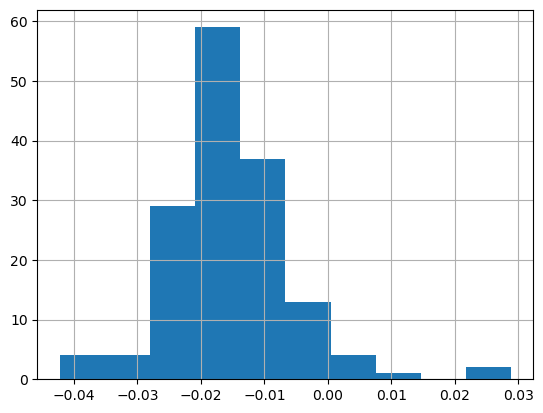

In [41]:
emosent_qc.gsr_x.hist()

<Axes: >

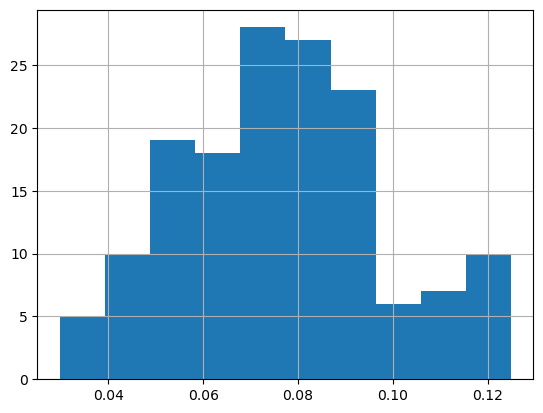

In [42]:
emosent_qc.gsr_y.hist()

<Axes: >

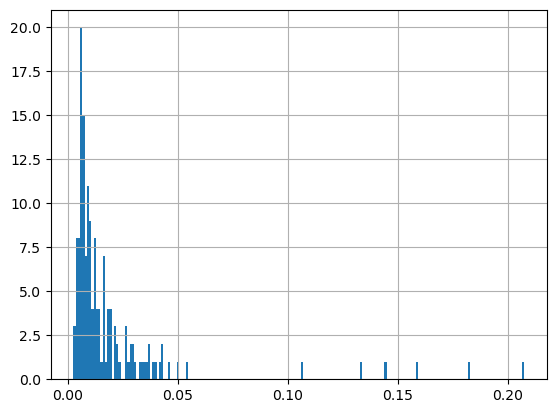

In [38]:
emosent_qc.gcor.hist(bins=200)

<Axes: >

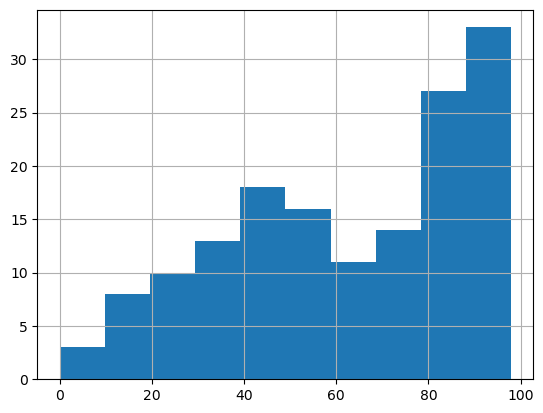

In [32]:
emosent_qc.fd_perc.hist()

<Axes: >

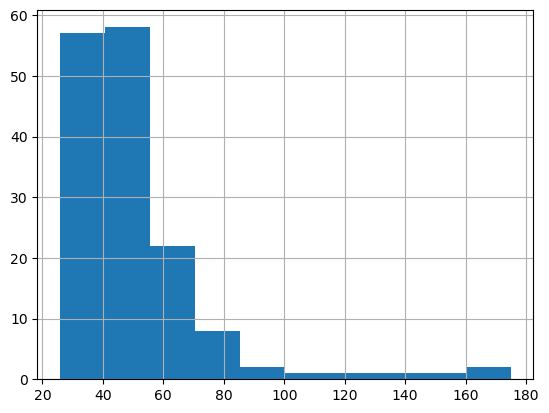

In [29]:
emosent_qc.dvars_nstd.hist()

<Axes: >

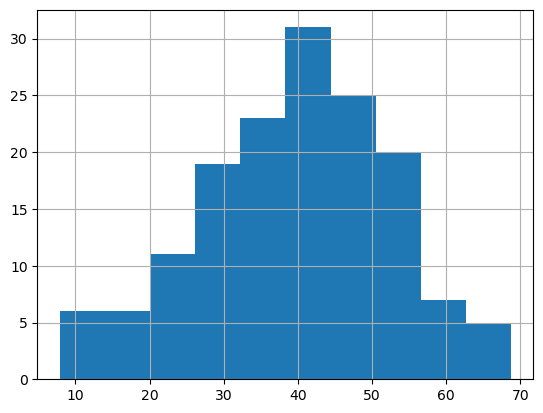

In [27]:
emosent_qc.tsnr.hist()

<Axes: >

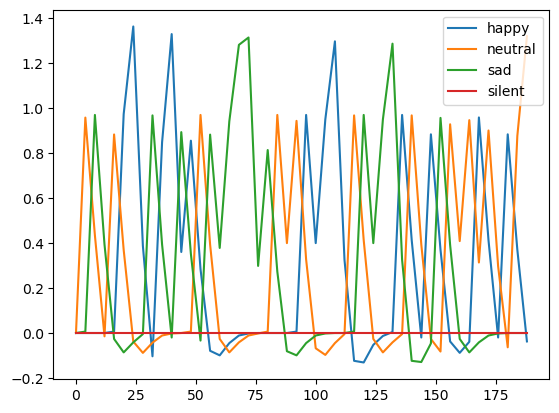

In [86]:
probe[1].plot()

In [41]:
probe

[array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,
         44.,  48.,  52.,  56.,  60.,  64.,  68.,  72.,  76.,  80.,  84.,
         88.,  92.,  96., 100., 104., 108., 112., 116., 120., 124., 128.,
        132., 136., 140., 144., 148., 152., 156., 160., 164., 168., 172.,
        176., 180., 184., 188.]),
 array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,
         44.,  48.,  52.,  56.,  60.,  64.,  68.,  72.,  76.,  80.,  84.,
         88.,  92.,  96., 100., 104., 108., 112., 116., 120., 124., 128.,
        132., 136., 140., 144., 148., 152., 156., 160., 164., 168., 172.,
        176., 180., 184., 188.])]

In [67]:
pd.read_table('test/sub-voice875_ses-1_task-emosent_run-2_events.tsv')

,onset,duration,trial_type,sentence,speak_start
0,0.00,3.890000,neutral,Have you seen him?,1.1223
1,3.89,3.980000,sad,I can't seem to do well on my exams,5.0231
2,7.87,4.000000,silent,NaN,8.9953
3,11.87,3.990000,neutral,The airplane is almost full,13.0021
4,15.86,4.000000,happy,What joke could be funnier than that?,16.9920
5,19.86,4.000000,happy,That was a blast,20.9920
6,23.86,4.000000,silent,NaN,24.9924
7,27.86,4.000000,sad,Please forgive me,28.9927
8,31.86,4.000000,happy,I highly recommend that professor,32.9930
9,35.86,4.000000,happy,Isn't that beautiful?,36.9930


In [83]:
#!rm -r test/*875*nii
!ls test/*875*

test/sub-voice875_ses-1_task-emosent_rec-unco_run-1_space-fsLR_den-91k_contrast-speechvsil_effect_size.dscalar.nii
test/sub-voice875_ses-1_task-emosent_rec-unco_run-1_space-fsLR_den-91k_contrast-speechvsil_effect_variance.dscalar.nii
test/sub-voice875_ses-1_task-emosent_rec-unco_run-1_space-fsLR_den-91k_contrast-speechvsil_z_score.dscalar.nii
test/sub-voice875_ses-1_task-emosent_rec-unco_run-2_space-fsLR_den-91k_contrast-speechvsil_effect_size.dscalar.nii
test/sub-voice875_ses-1_task-emosent_rec-unco_run-2_space-fsLR_den-91k_contrast-speechvsil_effect_variance.dscalar.nii
test/sub-voice875_ses-1_task-emosent_rec-unco_run-2_space-fsLR_den-91k_contrast-speechvsil_z_score.dscalar.nii
test/sub-voice875_ses-1_task-emosent_run-1_events.tsv
test/sub-voice875_ses-1_task-emosent_run-2_events.tsv


In [84]:
#first_lv_betas = glob.glob('test/*nii')
first_lv_betas = glob.glob('test/*875*nii')
first_img = {parse_file_entities(b)['subject']+ '_run-' + str(parse_file_entities(b)['run']):
       pd.DataFrame(nimg.load_img(b).get_fdata(dtype='f4')).T for b in first_lv_betas}

In [51]:
# r = 3
# image = nimg.load_img(f'test/sub-voice856_ses-1_task-emosent_rec-unco_run-{r}_space-fsLR_den-91k_contrast-speechvsil_z_score.dscalar.nii')

# r = 'fixed'
# image = nimg.load_img('test/second_level/sub-voice856_ses-1_task-emosent_rec-unco_space-fsLR_den-91k_contrast-speechvsil_effect_size_fx.dscalar.nii')
# contrast_maps = pd.DataFrame(image.get_fdata(dtype='f4')).T
# from scipy import stats
# contrast_maps = contrast_maps.apply(lambda z: stats.zscore(z))

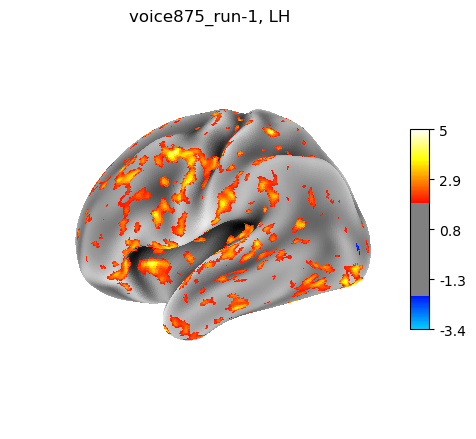

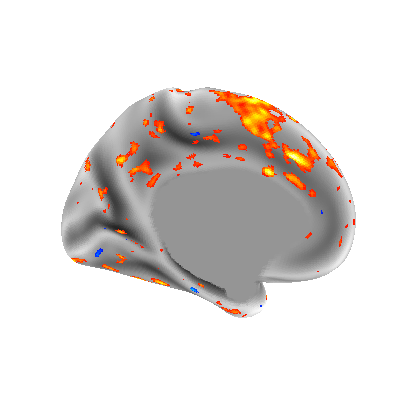

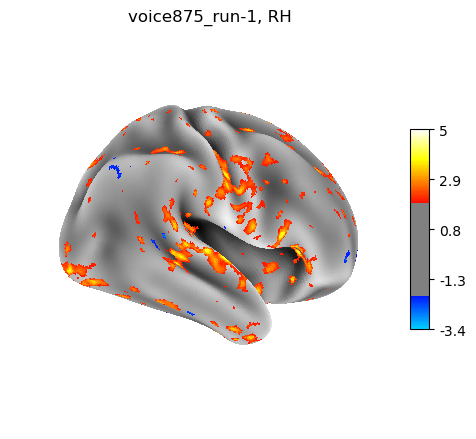

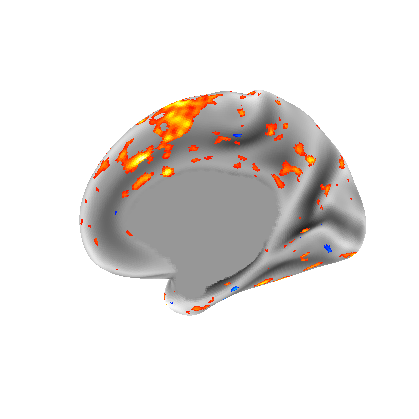

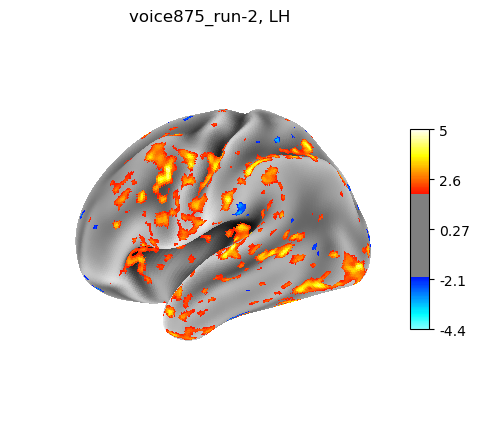

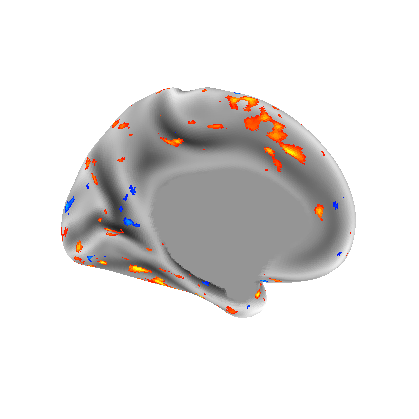

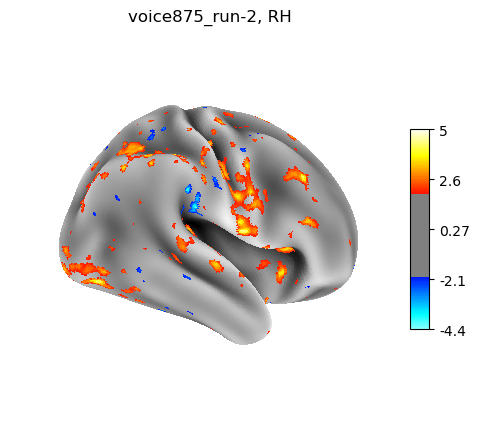

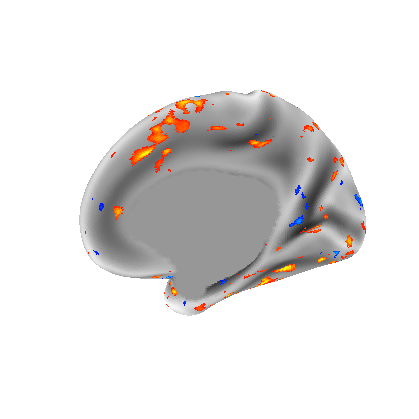

In [85]:
vmax = 5

# cifti = nib.load('../../derivatives/second_level_110123/sub-voice844_ses-1_task-nwr_rec-unco_run-1_space-fsLR_den-91k_contrast-spchsil_effect_size.dscalar.nii')
# cifti_hdr = cifti.header
# axes = [cifti_hdr.get_axis(i) for i in range(cifti.ndim)]
for sub_run, contrast_maps in first_img.items():
    for c in contrast_maps.columns:

        title = sub_run
        #threshold = fdr_threshold(contrast_maps[c], alpha=0.05)
        threshold = 1.96
        #threshold = 0
        nplot.plot_surf_stat_map(
            hcp.mesh.inflated, hcp.cortex_data(contrast_maps[c]), hemi='left', threshold=threshold,
            symmetric_cbar = False,
            colorbar=True,
            title = f'{title}, LH', #output_file=f'{root}/{c}_hemi-LH_view-lateral.png',
            title_font_size=30, vmax = vmax,
            bg_map=hcp.mesh.sulc)

        nplot.plot_surf_stat_map(
            hcp.mesh.inflated_left, hcp.left_cortex_data(contrast_maps[c]), view= 'lateral',
            hemi='right', threshold=threshold,
            symmetric_cbar = False, #output_file=f'{root}/{c}_hemi-LH_view-medial.png',
            colorbar=False, vmax = vmax,  
            bg_map=hcp.mesh.sulc_left)

        nplot.plot_surf_stat_map(
            hcp.mesh.inflated, hcp.cortex_data(contrast_maps[c]), hemi='right', threshold=threshold,
            symmetric_cbar = False, #output_file=f'{root}/{c}_hemi-RH_view-lateral.png',
            colorbar=True,
            title = f'{title}, RH', vmax = vmax,
            bg_map=hcp.mesh.sulc)

        nplot.plot_surf_stat_map(
            hcp.mesh.inflated_right, hcp.left_cortex_data(contrast_maps[c]), view= 'lateral',
            hemi='left', threshold=threshold,
            symmetric_cbar = False, #output_file=f'{root}/{c}_hemi-RH_view-medial.png',
            colorbar=False, vmax = vmax,
            bg_map=hcp.mesh.sulc_right)

    #     subcortical = utils.volume_from_cifti(contrast_maps[c], axes[1])#.get_fdata(dtype='f4')
    #     nplot.plot_stat_map(subcortical, #threshold=threshold, #cut_coords=cut_coord,
    #                     vmax=vmax, title=f'subcortical')

        nplot.show()

In [18]:
second_lv_betas = glob.glob('test/second_level/*effect_size*')
second_img = {parse_file_entities(b)['subject']:
       pd.DataFrame(nimg.load_img(b).get_fdata(dtype='f4')).T for b in second_lv_betas}

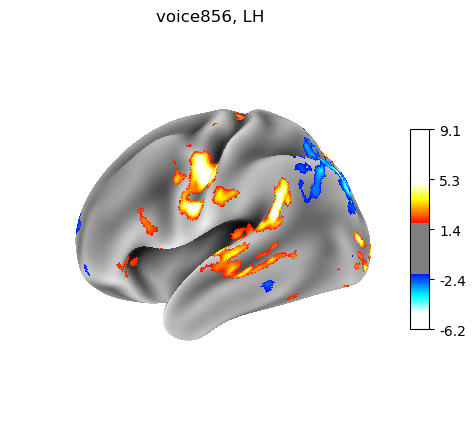

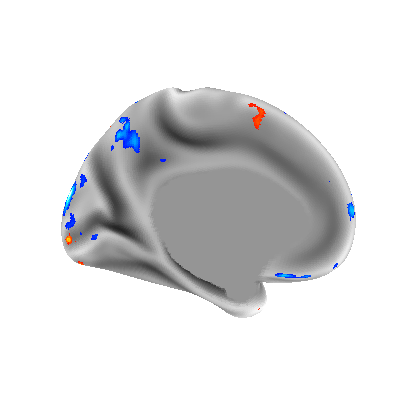

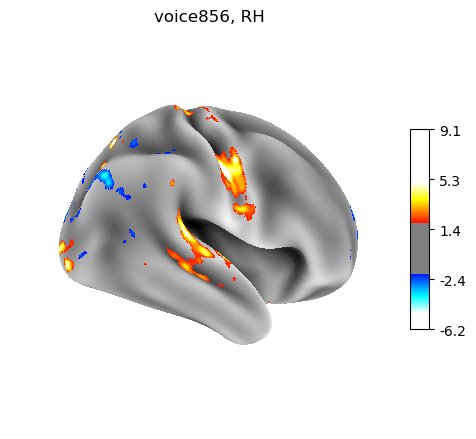

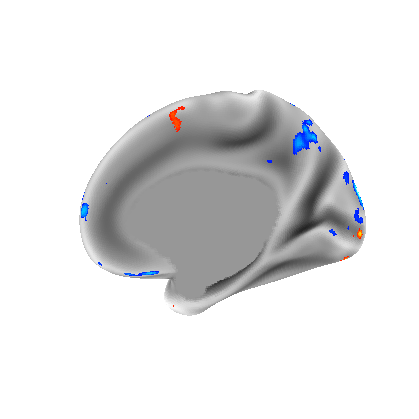

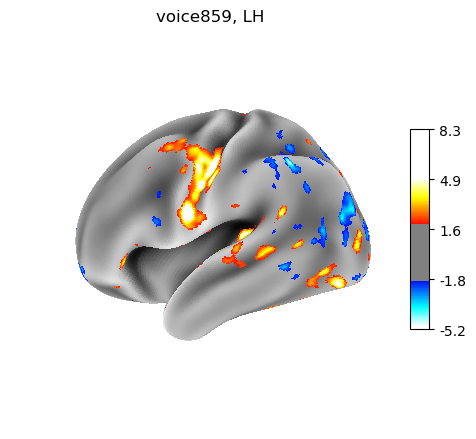

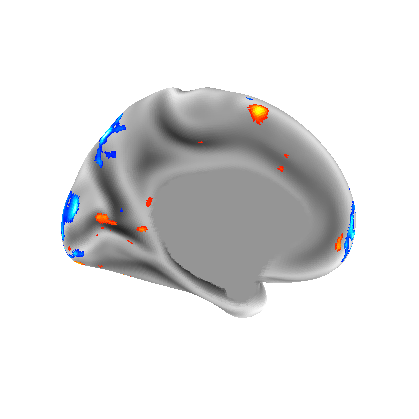

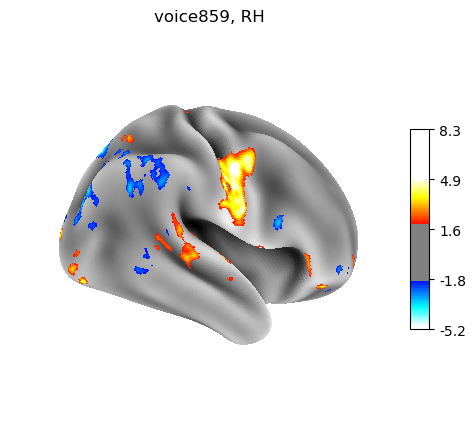

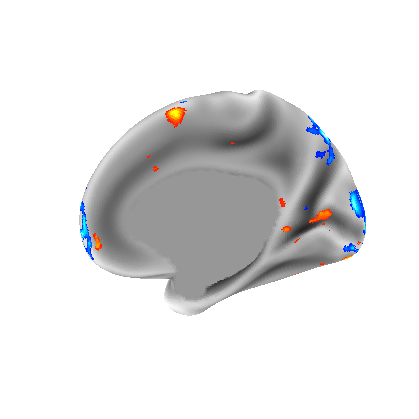

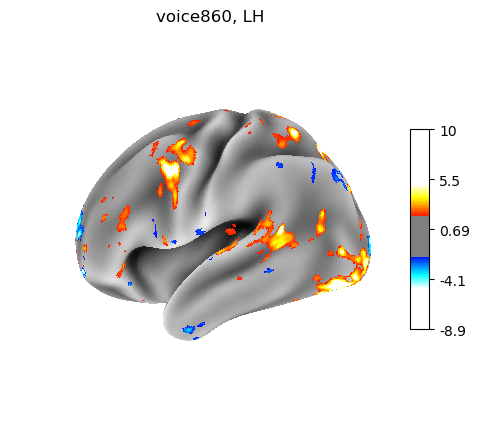

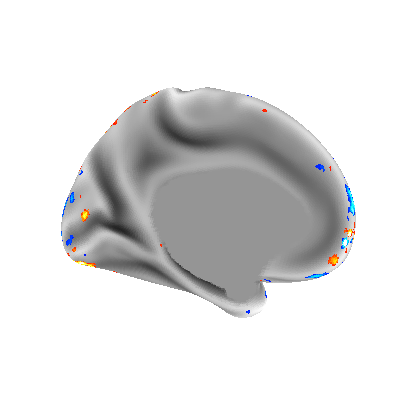

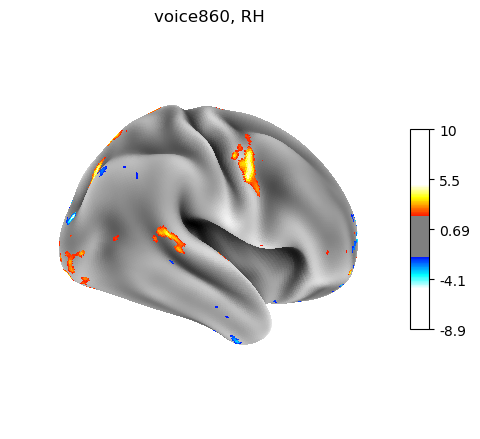

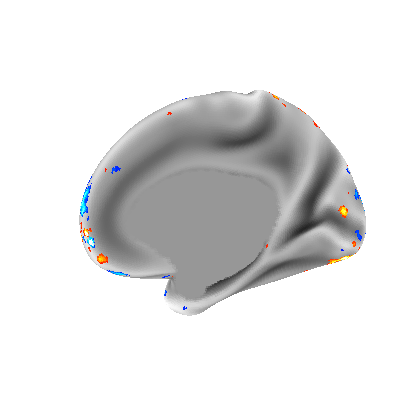

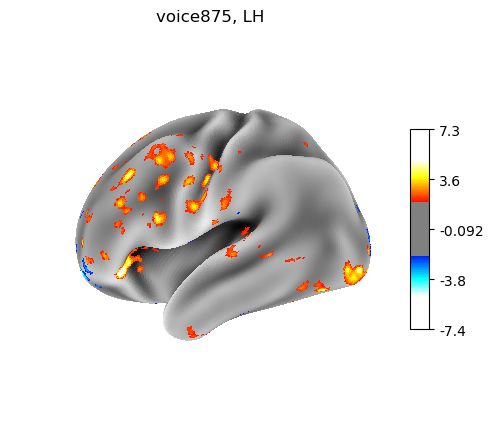

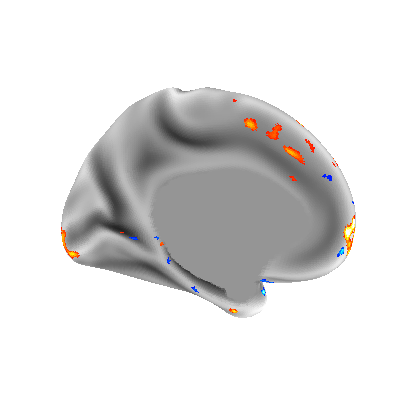

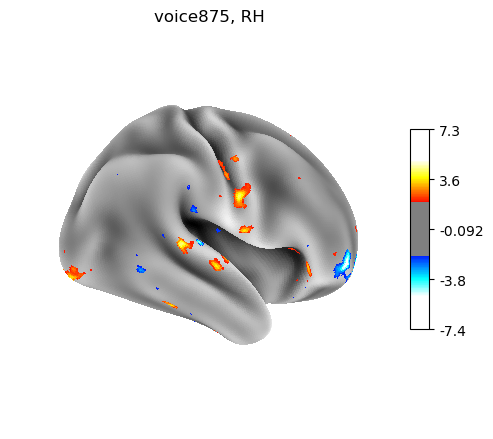

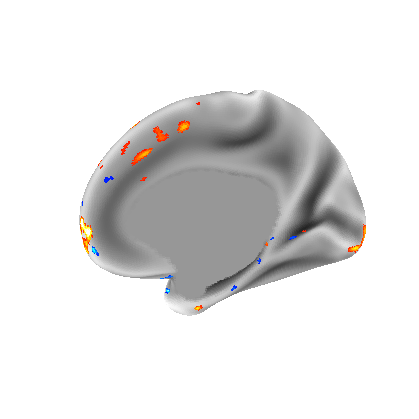

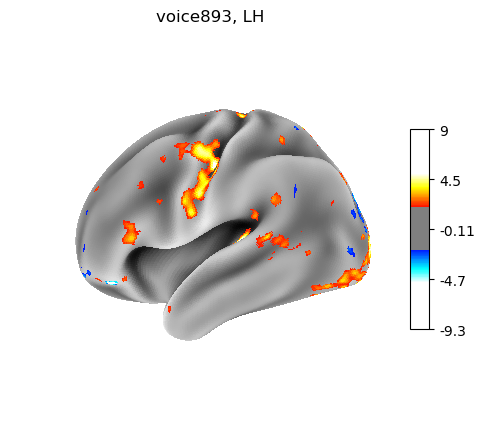

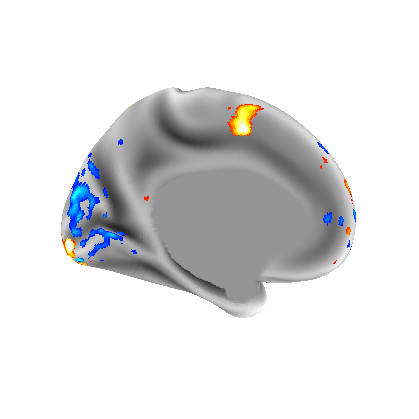

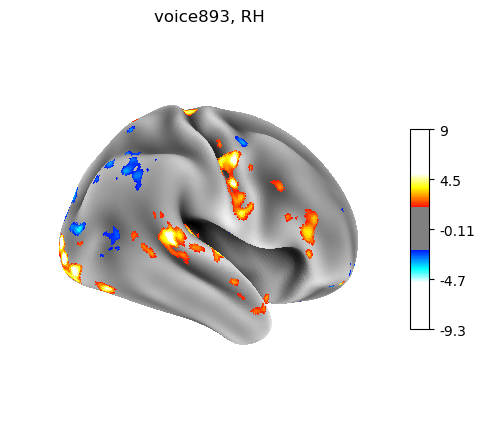

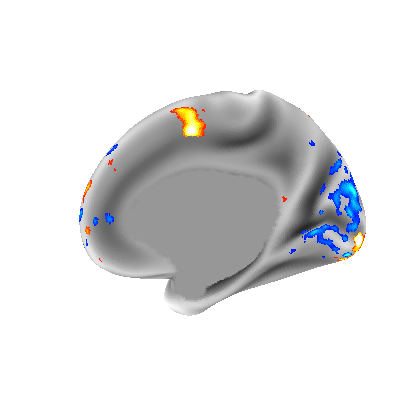

In [20]:
from scipy import stats

vmax = 5

# cifti = nib.load('../../derivatives/second_level_110123/sub-voice844_ses-1_task-nwr_rec-unco_run-1_space-fsLR_den-91k_contrast-spchsil_effect_size.dscalar.nii')
# cifti_hdr = cifti.header
# axes = [cifti_hdr.get_axis(i) for i in range(cifti.ndim)]
for sub_run, contrast_maps in second_img.items():
    for c in contrast_maps.columns:

        title = sub_run
        contrast_maps = contrast_maps.apply(lambda z: stats.zscore(z))
        #threshold = fdr_threshold(contrast_maps[c], alpha=0.05)
        threshold = 1.96
    #    threshold = 0
        nplot.plot_surf_stat_map(
            hcp.mesh.inflated, hcp.cortex_data(contrast_maps[c]), hemi='left', threshold=threshold,
            symmetric_cbar = False,
            colorbar=True,
            title = f'{title}, LH', #output_file=f'{root}/{c}_hemi-LH_view-lateral.png',
            title_font_size=30, vmax = vmax,
            bg_map=hcp.mesh.sulc)

        nplot.plot_surf_stat_map(
            hcp.mesh.inflated_left, hcp.left_cortex_data(contrast_maps[c]), view= 'lateral',
            hemi='right', threshold=threshold,
            symmetric_cbar = False, #output_file=f'{root}/{c}_hemi-LH_view-medial.png',
            colorbar=False, vmax = vmax,  
            bg_map=hcp.mesh.sulc_left)

        nplot.plot_surf_stat_map(
            hcp.mesh.inflated, hcp.cortex_data(contrast_maps[c]), hemi='right', threshold=threshold,
            symmetric_cbar = False, #output_file=f'{root}/{c}_hemi-RH_view-lateral.png',
            colorbar=True,
            title = f'{title}, RH', vmax = vmax,
            bg_map=hcp.mesh.sulc)

        nplot.plot_surf_stat_map(
            hcp.mesh.inflated_right, hcp.left_cortex_data(contrast_maps[c]), view= 'lateral',
            hemi='left', threshold=threshold,
            symmetric_cbar = False, #output_file=f'{root}/{c}_hemi-RH_view-medial.png',
            colorbar=False, vmax = vmax,
            bg_map=hcp.mesh.sulc_right)

    #     subcortical = utils.volume_from_cifti(contrast_maps[c], axes[1])#.get_fdata(dtype='f4')
    #     nplot.plot_stat_map(subcortical, #threshold=threshold, #cut_coords=cut_coord,
    #                     vmax=vmax, title=f'subcortical')

        nplot.show()

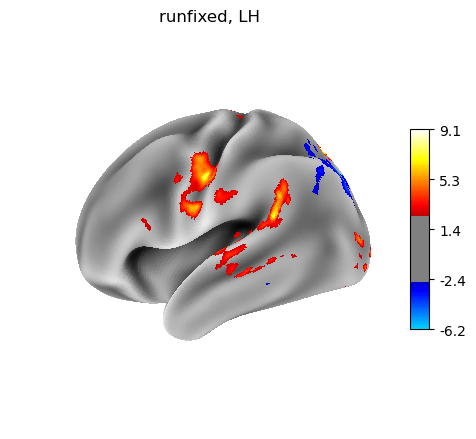

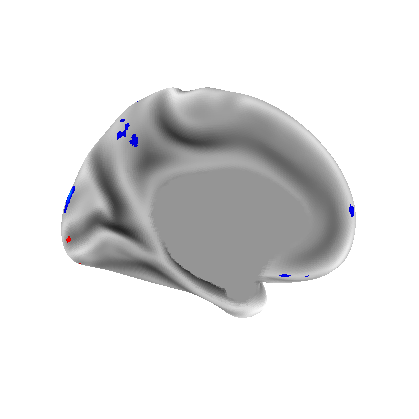

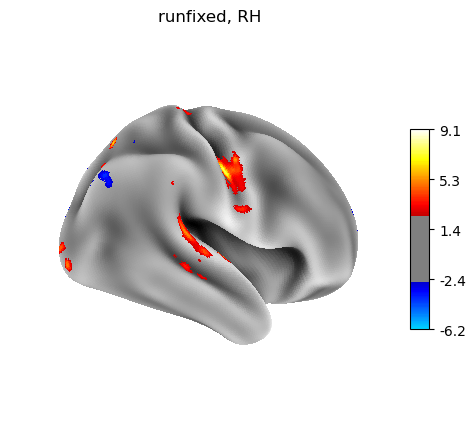

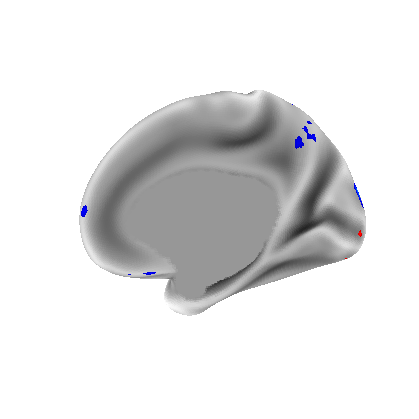

In [52]:
#vmax = 3

# cifti = nib.load('../../derivatives/second_level_110123/sub-voice844_ses-1_task-nwr_rec-unco_run-1_space-fsLR_den-91k_contrast-spchsil_effect_size.dscalar.nii')
# cifti_hdr = cifti.header
# axes = [cifti_hdr.get_axis(i) for i in range(cifti.ndim)]

for c in contrast_maps.columns:
    
    title = f'run{r}'
    #threshold = fdr_threshold(contrast_maps[c], alpha=0.05)
    threshold = 2.576
#    threshold = 0
    nplot.plot_surf_stat_map(
        hcp.mesh.inflated, hcp.cortex_data(contrast_maps[c]), hemi='left', threshold=threshold,
        symmetric_cbar = False,
        colorbar=True,
        title = f'{title}, LH', #output_file=f'{root}/{c}_hemi-LH_view-lateral.png',
        title_font_size=30, #vmax = vmax,
        bg_map=hcp.mesh.sulc)

    nplot.plot_surf_stat_map(
        hcp.mesh.inflated_left, hcp.left_cortex_data(contrast_maps[c]), view= 'lateral',
        hemi='right', threshold=threshold,
        symmetric_cbar = False, #output_file=f'{root}/{c}_hemi-LH_view-medial.png',
        colorbar=False, #vmax = vmax,  
        bg_map=hcp.mesh.sulc_left)

    nplot.plot_surf_stat_map(
        hcp.mesh.inflated, hcp.cortex_data(contrast_maps[c]), hemi='right', threshold=threshold,
        symmetric_cbar = False, #output_file=f'{root}/{c}_hemi-RH_view-lateral.png',
        colorbar=True,
        title = f'{title}, RH', #vmax = vmax,
        bg_map=hcp.mesh.sulc)

    nplot.plot_surf_stat_map(
        hcp.mesh.inflated_right, hcp.left_cortex_data(contrast_maps[c]), view= 'lateral',
        hemi='left', threshold=threshold,
        symmetric_cbar = False, #output_file=f'{root}/{c}_hemi-RH_view-medial.png',
        colorbar=False, #vmax = vmax,
        bg_map=hcp.mesh.sulc_right)
    
#     subcortical = utils.volume_from_cifti(contrast_maps[c], axes[1])#.get_fdata(dtype='f4')
#     nplot.plot_stat_map(subcortical, #threshold=threshold, #cut_coords=cut_coord,
#                     vmax=vmax, title=f'subcortical')
    
    nplot.show()

In [17]:
# importlib.reload(flss)
# #out_dir='../../derivatives/first_level_percondition/'
# out_dir = '../../derivatives/first_level_emosent_ftest_112523/'
# #out_dir='test/'

# #flss.convolve_sparse_scan_glm_with_cifti(pvr_filtered[0:1], out_dir, ohbm=True, con='sadvneutral', resmooth=False)
# flss.convolve_sparse_scan_glm_with_cifti(pvr_filtered, out_dir, ohbm=True, con='emoftest', resmooth=False)

# #flss.convolve_sparse_scan_glm_with_cifti(parsed_valid_runs, out_dir)

started sub-voice844_ses-1_task-emosent_rec-unco_run-1
231125-15:37:14,572 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:37:14,574 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:37:14,575 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:37:14,578 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:37:14,580 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:37:14,581 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:37:14,584 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:37:14,586 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:37:14,587 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:37:14,590 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:37:14,592 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:37:14,593 nipype.interface INFO:
	 reg_scale: 43.1973
finished sub-voice844_ses-1_task-emosent_rec-unco_run-1
started sub-voice844_ses-1_task-emosent_rec-unco_run-2
23

231125-15:38:17,535 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:38:17,539 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:38:17,540 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:38:17,541 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:38:17,544 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:38:17,546 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:38:17,547 nipype.interface INFO:
	 reg_scale: 43.1973
finished sub-voice856_ses-1_task-emosent_rec-unco_run-2
started sub-voice857_ses-1_task-emosent_rec-unco_run-1
231125-15:38:25,143 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:38:25,145 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:38:25,146 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:38:25,149 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:38:25,150 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:38:25,151 nipype.interface INFO:
	 reg_scale: 4

231125-15:39:25,796 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:39:25,796 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:39:25,802 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:39:25,804 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:39:25,805 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:39:25,809 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:39:25,811 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:39:25,812 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:39:25,816 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:39:25,818 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:39:25,819 nipype.interface INFO:
	 reg_scale: 43.1973
finished sub-voice872_ses-1_task-emosent_rec-unco_run-1
started sub-voice875_ses-1_task-emosent_rec-unco_run-2
231125-15:39:33,745 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:39:33,748 nipype.interface INFO:
	 response sum

231125-15:40:26,905 nipype.interface INFO:
	 reg_scale: 43.1973
finished sub-voice893_ses-1_task-emosent_rec-unco_run-1
started sub-voice893_ses-1_task-emosent_rec-unco_run-2
231125-15:40:34,456 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:40:34,458 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:40:34,459 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:40:34,462 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:40:34,464 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:40:34,465 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:40:34,468 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:40:34,470 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:40:34,471 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:40:34,474 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:40:34,476 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:40:34,477 nipype.interface INFO:
	 reg_scale: 4

231125-15:41:35,885 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:41:35,889 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:41:35,892 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:41:35,893 nipype.interface INFO:
	 reg_scale: 43.1973
finished sub-voice949_ses-1_task-emosent_rec-unco_run-1
started sub-voice949_ses-1_task-emosent_rec-unco_run-2
231125-15:41:43,458 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:41:43,460 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:41:43,461 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:41:43,464 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:41:43,466 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:41:43,466 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:41:43,470 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:41:43,471 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:41:43,472 nipype.interface INFO:
	 reg_scale: 4

231125-15:42:47,317 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:42:47,322 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:42:47,324 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:42:47,324 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:42:47,328 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:42:47,330 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:42:47,331 nipype.interface INFO:
	 reg_scale: 43.1973
finished sub-voice954_ses-1_task-emosent_rec-unco_run-2
started sub-voice955_ses-1_task-emosent_rec-unco_run-1
231125-15:42:55,440 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:42:55,442 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:42:55,443 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:42:55,446 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:42:55,448 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:42:55,448 nipype.interface INFO:
	 reg_scale: 4

231125-15:44:00,570 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:44:00,571 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:44:00,578 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:44:00,581 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:44:00,581 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:44:00,587 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:44:00,590 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:44:00,591 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:44:00,596 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:44:00,599 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:44:00,600 nipype.interface INFO:
	 reg_scale: 43.1973
finished sub-voice960_ses-1_task-emosent_rec-unco_run-1
started sub-voice960_ses-1_task-emosent_rec-unco_run-2
231125-15:44:08,197 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:44:08,199 nipype.interface INFO:
	 response sum

231125-15:45:01,517 nipype.interface INFO:
	 reg_scale: 43.1973
finished sub-voice964_ses-1_task-emosent_rec-unco_run-1
started sub-voice964_ses-1_task-emosent_rec-unco_run-2
231125-15:45:09,239 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:45:09,240 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:45:09,241 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:45:09,243 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:45:09,244 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:45:09,244 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:45:09,247 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:45:09,248 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:45:09,248 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:45:09,251 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:45:09,252 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:45:09,252 nipype.interface INFO:
	 reg_scale: 4

231125-15:46:10,960 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:46:10,964 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:46:10,966 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:46:10,967 nipype.interface INFO:
	 reg_scale: 43.1973
finished sub-voice975_ses-1_task-emosent_rec-unco_run-1
started sub-voice975_ses-1_task-emosent_rec-unco_run-2
231125-15:46:18,713 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:46:18,714 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:46:18,715 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:46:18,717 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:46:18,718 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:46:18,719 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:46:18,721 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:46:18,722 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:46:18,723 nipype.interface INFO:
	 reg_scale: 4

231125-15:47:20,707 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:47:20,711 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:47:20,713 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:47:20,714 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:47:20,717 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:47:20,719 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:47:20,720 nipype.interface INFO:
	 reg_scale: 43.1973
finished sub-voice981_ses-1_task-emosent_rec-unco_run-1
started sub-voice981_ses-1_task-emosent_rec-unco_run-2
231125-15:47:28,503 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:47:28,505 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:47:28,505 nipype.interface INFO:
	 reg_scale: 43.1973
231125-15:47:28,508 nipype.interface INFO:
	 Setting dt = 110 ms

231125-15:47:28,509 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231125-15:47:28,509 nipype.interface INFO:
	 reg_scale: 4